In [2]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset,DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Titanic-Dataset.csv")


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# 資料探勘與前處理

In [5]:
total_data=pd.DataFrame()
total_data=total_data.append(data)

In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##PassengerId

In [ ]:
data['PassengerId'].head(15)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
Name: PassengerId, dtype: int64

##Survived

In [ ]:
total_data['Survived'].unique()

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


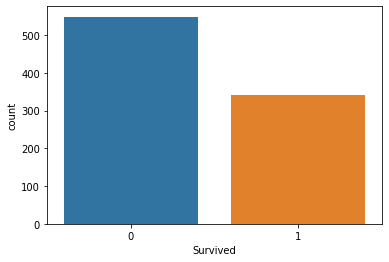

In [ ]:
sns.countplot(data['Survived'])

##Pclass

In [ ]:
total_data['Pclass'].unique()

array([3, 1, 2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


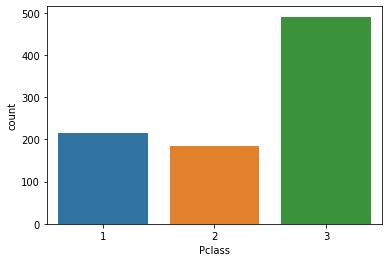

In [ ]:
sns.countplot(data['Pclass'])

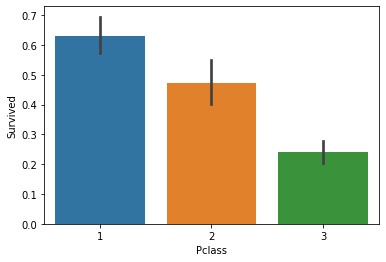

In [ ]:
sns.barplot(x='Pclass',y="Survived",data=data)

## Sex

In [ ]:
total_data['Sex'].unique()

array(['male', 'female'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


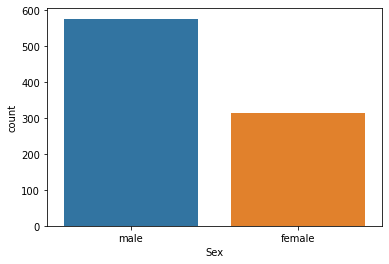

In [ ]:
sns.countplot(data['Sex'])

In [ ]:
labelencoder=LabelEncoder()
total_data['Sex']=labelencoder.fit_transform(total_data['Sex'])

In [ ]:
total_data['Sex'].unique()

array([1, 0])

##age

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
data['Age_qcut']=pd.qcut(data['Age'],8)

In [ ]:
data['Age_qcut'].unique()

[(20.125, 24.0], (32.312, 38.0], (24.0, 28.0], NaN, (47.0, 80.0], (0.419, 16.0], (16.0, 20.125], (38.0, 47.0], (28.0, 32.312]]
Categories (8, interval[float64, right]): [(0.419, 16.0] < (16.0, 20.125] < (20.125, 24.0] <
                                           (24.0, 28.0] < (28.0, 32.312] < (32.312, 38.0] <
                                           (38.0, 47.0] < (47.0, 80.0]]

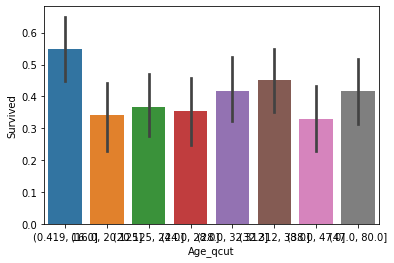

In [ ]:
sns.barplot(x=data['Age_qcut'],y=data['Survived'])

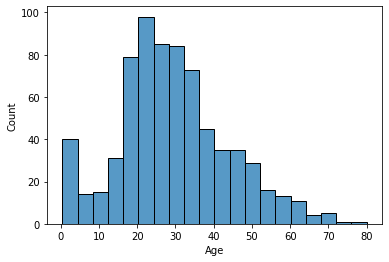

In [ ]:
sns.histplot(data['Age'])

In [ ]:
total_data.loc[total_data['Age']<=16,'Age']=1

In [ ]:
total_data.loc[total_data['Age']!=1,'Age']=2

In [ ]:
total_data['Age'].unique()

array([2., 1.])

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


##SibSp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


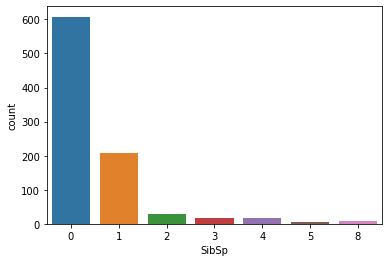

In [ ]:
sns.countplot(data['SibSp'])

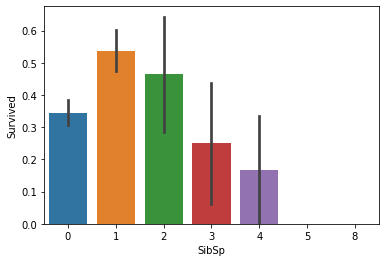

In [ ]:
sns.barplot(x='SibSp',y='Survived',data=data)

In [ ]:
total_data.loc[ (total_data['SibSp']==1) | (total_data['SibSp']==2),'SibSp']=1

In [ ]:
total_data.loc[ total_data['SibSp']>2,'SibSp']=2

In [ ]:
total_data.loc[ total_data['SibSp']<1 ,'SibSp']=0

In [ ]:
total_data['SibSp'].value_counts()

0    608
1    237
2     46
Name: SibSp, dtype: int64

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


## Parch

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


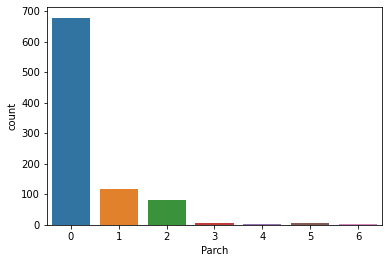

In [ ]:
sns.countplot(data['Parch'])

In [ ]:
total_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

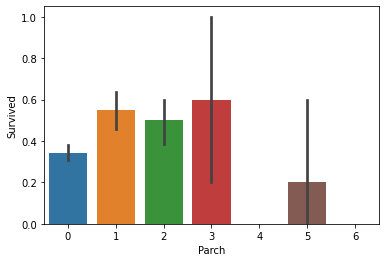

In [ ]:
sns.barplot(x='Parch',y='Survived',data=data)

In [ ]:
total_data['Parch_cut']=pd.cut(total_data['Parch'],[-1,0,3,9])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


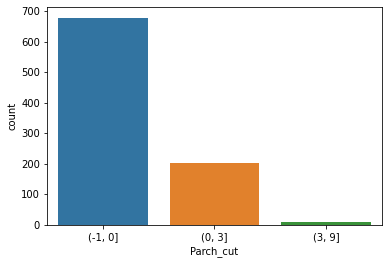

In [ ]:
sns.countplot(total_data['Parch_cut'])

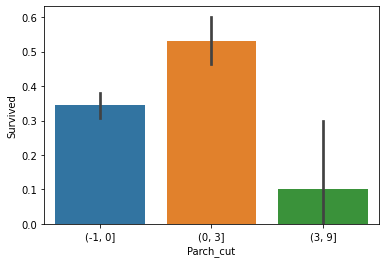

In [ ]:
sns.barplot(x=total_data['Parch_cut'],y=total_data['Survived'])

In [ ]:
total_data.loc[ (total_data['Parch']>0) & (total_data['Parch']<=3) ,'Parch' ]=2

In [ ]:
total_data.loc[ total_data['Parch']>4 ,'Parch' ]=4

In [ ]:
total_data.loc[ total_data['Parch']<1,'Parch' ]=1

In [ ]:
total_data['Parch'].value_counts()

1    678
2    203
4     10
Name: Parch, dtype: int64

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Parch_cut    891 non-null    category
dtypes: category(1), float64(2), int64(6), object(4)
memory usage: 84.7+ KB


##Fare

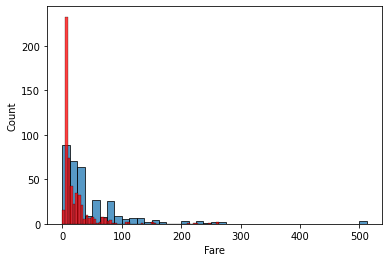

In [ ]:
sns.histplot(data[data['Survived']==1]['Fare'])
sns.histplot(data[data['Survived']==0]['Fare'],color='red')

In [ ]:
data['Fare_cut']=pd.cut(data['Fare'],[-1,15,50,1000])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


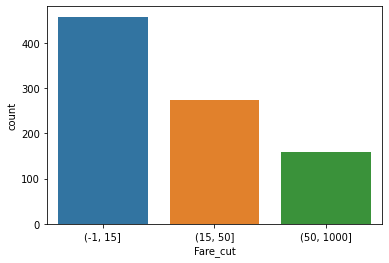

In [ ]:
sns.countplot(data['Fare_cut'])

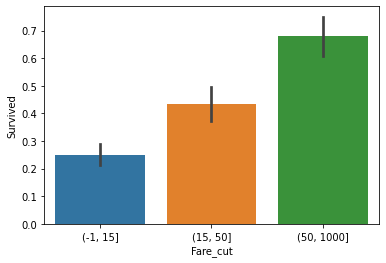

In [ ]:
sns.barplot(x=data['Fare_cut'],y=data['Survived'])

In [ ]:
total_data.loc[total_data['Fare']<=15,'Fare']=1

In [ ]:
total_data.loc[ (total_data['Fare']>15) & (total_data['Fare']<=50),'Fare']=2

In [ ]:
total_data.loc[ total_data['Fare']>2,'Fare']=3

In [ ]:
total_data['Fare'].value_counts()

1.0    458
2.0    273
3.0    160
Name: Fare, dtype: int64

In [ ]:
total_data['Fare']=total_data['Fare'].fillna(1)

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Parch_cut    891 non-null    category
dtypes: category(1), float64(2), int64(6), object(4)
memory usage: 84.7+ KB


## Embarked

In [ ]:
total_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


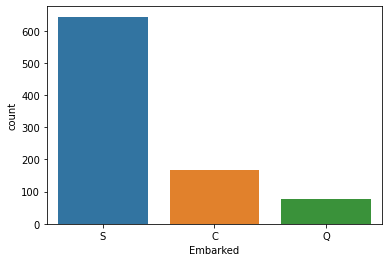

In [ ]:
sns.countplot(total_data['Embarked'])

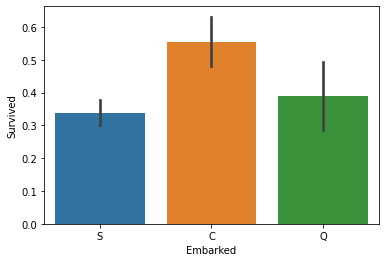

In [ ]:
sns.barplot(x=data['Embarked'],y=data['Survived'])

In [ ]:
total_data['Embarked']=total_data['Embarked'].fillna('S')

In [ ]:
total_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
total_data['Embarked']=labelencoder.fit_transform(total_data['Embarked'])

In [ ]:
total_data['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    int64   
 12  Parch_cut    891 non-null    category
dtypes: category(1), float64(2), int64(7), object(3)
memory usage: 84.7+ KB


# 將DataFram轉成ndarray

In [9]:
train_x=total_data[total_data['Survived'].notnull()][['Pclass','Sex','Age','SibSp','Parch','Embarked']].values
train_y=total_data[total_data['Survived'].notnull()][['Survived']].values
test_x=total_data[total_data['Survived'].isnull()][['Pclass','Sex','Age','SibSp','Parch','Embarked']].values
test_y=total_data[total_data['Survived'].isnull()][['Survived']].values

In [10]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(891, 6)
(891, 1)
(0, 6)
(0, 1)


#分成train_set、validate_set


In [11]:
train_x,valid_x,train_y,valid_y=train_test_split(train_x,train_y,test_size=0.2)

In [ ]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

(712, 6)
(179, 6)
(712, 1)
(179, 1)


In [15]:
print(total_data)
print(train_x)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

#SVM


In [ ]:
from sklearn import svm

In [ ]:
svm_model=svm.SVC()
# svm_model=svm.LinearSVC()
#svm.LinearSVC 為SVM的classifier
#svm.LinearSVR 為SVM的regression
##我們這邊輸出是要分成0或1，所以用SVC

In [ ]:
svm_model.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
svm_model.score(train_x,train_y)

0.8286516853932584

In [ ]:
svm_model.score(valid_x,valid_y)

0.8212290502793296

#confusion matrix and accuracy 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = svm_model.predict(valid_x)

Accuracy_Score = accuracy_score(valid_y, y_pred)
CM = confusion_matrix(valid_y, y_pred)

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Confusion Matrix:\n',CM)


Average Accuracy: 82.12 +/- (0.0) %
Confusion Matrix:
 [[97  9]
 [23 50]]


In [ ]:

y_pred = svm_model.predict(train_x)

Accuracy_Score = accuracy_score(train_y, y_pred)
CM = confusion_matrix(train_y, y_pred)

print('Average Accuracy: %0.2f +/- (%0.1f) %%' % (Accuracy_Score.mean()*100, Accuracy_Score.std()*100))
print('Confusion Matrix:\n',CM)

Average Accuracy: 82.87 +/- (0.0) %
Confusion Matrix:
 [[398  45]
 [ 77 192]]
